<img src="logo.png" width=200 height=200>


# Regularización Paramétrica

> __Alcance de la lectura:__
> * Conocer la terminología y conceptos básicos ocupados en machine learning.
> * Tener un primer acercamiento a los problemas canónicos en máquinas de aprendizaje.
> * Conocer las normas $\mathscr{l}_{1}$ y $\mathscr{l}_{2}$.
> * Conocer la mecánica de regularización en los métodos Ridge, Lasso y Elastic-net.
> * Utilizar los métodos de regularización para resolver problemas de dimensionalidad y mejora de desempeño predictivo.
> * Implementar los métodos con la librería `sklearn`.
> * Visualizar el comportamiento de las variables en ambos métodos.
lizar el comportamiento de las variables en ambos métodos.


## Précis: Conceptos básicos de las máquinas de aprendizaje

Antes de comenzar a ver modelos y funciones matemáticas, es bueno dedicar tiempo a asimilar los conceptos básicos que serán utilizados en este módulo y que encontrarán en las referencias y artículos sobre machine learning en general.

En machine learning hay dos problemas canónicos dentro de los cuales se pueden clasificar casi la totalidad de los modelos actuales: El problema de la **regresión** y el de la **clasificación**. 

Regresión hace referencia a la habilidad de un modelo de ser capaz de entregarnos un output en forma numérica. Por ejemplo, predecir el valor de la temperatura para el día siguiente, predecir el valor de una acción en la bolsa o incluso la probabilidad de algún suceso. Todo método que entregue un output numérico se considera en general que esta resolviendo un problema de regresión. 

Clasificación son  problemas donde se quiere encontrar o predecir la *clase* a la que pertenece un cierto registro. Por ejemplo, dada la descripción física de una persona (peso, estatura, medidas corporales) determinar si es hombre o mujer, o determinar la acción más conveniente a ser realizada frente a ciertas condiciones. En todos estos casos, el output no es un número, sino una *clase*.

Con lo anterior en mente, podemos definir una *máquina de aprendizaje* (o un *learner*) como un modelo **matemático** con las siguientes características:

### Función Objetivo:
> Es la función matemática que el modelo tratará de optimizar, al optimizar esta función el modelo se *entrena* y aprende los parámetros correspondientes.

### Entrenamiento
> Es el proceso mediante el cual la máquina optimiza su función objetivo y, al hacerlo, encuentra los valores de sus parámetros. Cada máquina distinta tiene parámetros distintos, por lo tanto para un mismo problema, resolverlo con dos o más máquinas disintas significa entrenar ambas máquinas por separado.


### Espacio de parámetros
> Es el espacio en el cual se encuentran todos los posibles **parámetros** para la máquina que estamos implementando. 
>
>Cuidado!: **El espacio de atributos no es lo mismo que el espacio de parámetros.**

### Atributos y variable objetivo
> Un *atributo* es una dimensión de medición,  una columna en nuestro dataset. Por ejemplo, la estatura de una persona es un atributo, la edad es otro atributo dentro de una base de datos. La variable objetivo (o *target*) es la variable que queremos predecir, ésta puede ser numérica (regresión) o categórica (clasificación), por ejemplo, el sexo de una persona (categórica) o la edad de la misma (numérica).

### Overfitting (sobre-ajuste)
> Fenómeno en el cual nuestro modelo aprendió demasiado bien el conjunto de datos de entrenamiento. Como consecuencia de esto, el modelo generó reglas internas que se apegan demasiado a estos datos y al evaluarlo en datos que nunca antes ha visto (datos nuevos), se comporta mal. Un ejemplo simple para recordar esta definición es pensar en un mal estudiante que aprende de memoria como hacer los ejercicios de la guía, sin entender en realidad el fenómeno que ocurre por detrás, como es de esperarse, cuando llega el momento de la prueba/certamen, no es capaz de **generalizar** lo poco que sabe y le va mal. Usualmente evitamos el overfitting implementando técnicas de regularización.

### Underfitting (sub-ajuste)
> Fenómeno en el cual nuestro modelo aprendió muy poco sobre el fenómeno subyacente en los datos y no es capaz de generalizar lo que aprendió durante el entrenamiento a datos nuevos. Usualmente evitamos el underfitting implementando técnicas de data augmentation o simplemente recolectando más data.

-----

## Regularización Paramétrica y métodos de contracción (shrinkage methods)

Recordando nuestras bases estadísticas, cuando queremos estimar ciertos parámetros de alguna distribución o modelo utilizando ciertos datos disponibles, lo haremos mediante el Método de Máxima Verosimilitud, pues este nos entrega estimadores casi insesgados con varianza casi mínima. Sin embargo, para muchas aplicaciones y modelos modernos esta aproximación es ineficiente o inadecuada debido a la alta cantidad de atributos. Tener estimadores insesgados se ha convertido en un lujo que, por lo general, no podremos permitirnos.


La regresión lineal clásica ya vista se apoya en una vesión del estimador MLE (Máximum Likelihood Method) para encontrar los parámetros del modelo. Recordemos la notación y forma de una regresión lineal multivariada, de forma matricial:

$$
\mathbf{Y} = \mathbf{X}\cdot \vec{\beta}
$$

O escrito de otra forma:

$$
y_i = \sum_{j=1}^{p}x_{i,j} \beta_j + \beta_0
$$

Donde:
* $\beta_j$: j-ésimo coeficiente asociado al atributo/columna $j$.
* $x_{i,j}$: i-ésimo registro de la columna $j$ del dataset.
* $\beta_0$: Intercepto de la regresión.
* $p$: Es la dimensión del dataset, o dicho de otra forma, la cantidad de columnas/atributos que tenemos.

En nuestro modelo lineal, los parámetros que se deben encontrar al entrenar son los coeficientes $\beta_j$ que definen la recta.
En este modelo usamos una función objetivo que minimiza la suma de los cuadrados de los errores (SSE):

$$
\beta_{\textsf{OLS}} = \underset{\beta}{\textsf{argmin}} \sum_{i}^{n} (y_i-\hat{y_i})^2
$$



### Digresión: Complejidad computacional y  la regresión lineal
> Un aspecto importante a considerar a lo largo de todo este módulo es la complejidad computacional de entrenar nuestros modelos. No es lo mismo entrenar un modelo con 1 parámetro (como una regresión lineal simple univariada), que entrenar una red neuronal con una cantidad de parámetros del orden de los millones. No entraremos en detalles sobre cómo calcular la complejidad computacional de un algoritmo, pero si es bueno tener una buena intuición sobre este tema.
>
> En general, un algoritmo (o modelo de entrenamiento en nuestro caso) es más *complejo* computacionalmente si realiza más operaciones elementales (como multiplicar dos números o sumarlos). Por lo tanto para un cierto modelo, la complejidad la podremos intuir considerando cuantas operaciones va a tener que realizar para antes de poder minimizar la función objetivo a un cierto valor aceptable (o mínimo). En el caso de la regresión lineal, la complejidad lamentablemente no la podremos intuir sin incluir notacion matricial engorrosa y tener que analizar casos de singularidades, sin embargo, de la regresión lineal podemos quedarnos con dos cosas:
> 1. Mientras más grande sea la matriz de atributos (filas y columnas del dataset) más operaciones tendrá que realizar, aumentando su tiempo de ejecución.
> 2. La regresión lineal, a diferencia de los métodos que veremos luego en el módulo, no es un método iterativo, es decir, encuentra el mínimo de la función objetivo sin necesidad de ir *acercándose* poco a poco a la solución. Esto es clave para analizar la complejidad del modelo pues en los modelos iterativos tendremos que decidir cuantas iteraciones hacer, considerando que cada iteración añade un costo correspondiente en complejidad.

----

## Intuición base sobre los métodos de regularización

Cuando nos enfrentamos a datos donde la cantidad de atributos es substancialmente mayor a la cantidad de observaciones, podemos sufrir de sobre-ajuste en nuestra función candidata que explique de muy buena forma las observaciones en la muestra de entrenamiento y fallar en generalizar la función en la muestra.

La estrategia que aprenderemos a lo largo de esta lectura es implementar técnicas que impidan que el modelo sufra de sobre ajuste, conocidas como regularización en norma $\mathscr{l}_{1}$ y $\mathscr{l}_{2}$. 

A grandes rasgos los métodos de regularización buscan penalizar parámetros $\boldsymbol\beta$ estimados con valores muy grandes. El objetivo es agregar un penalizador que sea __proporcional a la magnitud de $\boldsymbol\beta$__. Resulta que hay dos modos (también conocidas como __normas__) de generar regularización de parámetros:

* Norma $\mathscr{l}_{2}$: Llamada norma euclídea, sintetiza la distancia entre dos vectores mediante $\sqrt{x^{2} + y^{2}}$.
* Norma $\mathscr{l}_{1}$: Llamada norma taxicab, sintetiza la distancia entre dos vectores mediante $\vert \beta \vert$, lo que genera ángulos rectos entre los vectores.

Ambas normas tienen sus virtudes y defectos. Una imágen clásica que proviene de Hastie, Tibshirani y Friedman (2009) visualiza las normas (como las áreas celestes) y el efecto que tienen en los parámetros estimados (contornos rojos). El objetivo es encontrar un punto donde el contorno se junte con el área regularizada. Mientras que con la normalización $\mathscr{l}_{2}$ no hay soluciones únicas (dado que el área celeste es un círculo y hay un solo borde contínuo), en la normalización $\mathscr{l}_{1}$ existe la posibilidad que el contorno del parámetro estimado se junte con una de las esquinas del área, dando paso a situaciones donde algún parámetro sea igual a cero.

![](img/norms.png)

## Ridge: Norma-$\mathscr{l}_{2}$

La primera forma de crear modelos de regresión sesgados es agregando una penalización a la suma de los cuadrados, *Ridge* penaliza esta suma agregando el término $\lambda \sum_{j=1}^{p}\beta_j^2$. Luego, nuestra función de minimización queda de la siguiente forma:

$$
\beta_{\textsf{Ridge}} = \underset{\beta}{\textsf{argmin}} \sum_{i}^{n} (y_i-\hat{y_i})^2 + \lambda \sum_{j=1}^{p}\beta_j^2
$$

Cuando nuestro modelo lineal sobre-ajusta los datos de entrenamiento algunos de los coeficientes de la regresión se *inflan*, provocando que tengan valores altos en comparación con los demás. Al penalizar la función objetivo de la forma anterior, el aumentar el valor de alguno de los coeficientes se traduce en una penalización a la función objetivo, luego, solo se permitirá el incremento de un coeficiente cuando se produce una reducción proporcional en la suma de los cuadrados.

* Ridge también se conoce como **regularización en norma $\mathscr{l}_{2}$** porque el término que se agrega en la función objetivo en realidad es la norma $\mathscr{l}_{2}$ (o norma euclídea) de un vector cuyo largo es la magnitud del coeficiente correspondiente.

¿Y de dónde sacamos ese $\lambda$ que aparece multiplicando a la suma? Para entender cómo encontrar el valor de $\lambda$ debemos entender primero cual es su rol en el término *penalizador*. Si nos fijamos, $\lambda$  multiplica cada coeficiente por igual, por lo tanto, $\lambda$ dice *cuanto* se está penalizando el modelo frente a un determinado cambio en un coeficiente. Mientras más alto sea $\lambda$, el modelo recibirá un mayor "_castigo_" cuando intente aumentar un coeficiente. $\lambda$ es un valor que tendremos que escoger nosotros al momento de definir el modelo con regularización. 

### Digresión: Cotas asintóticas en funciones objetivo

> Una observación interesante que debemos tener en cuenta es que si $\lambda = 0$ en la fución objetivo de Ridge, lo que obtenemos como resultado es una regresión lineal ordinaria, pues el termino completo se hace igual a $0$. De esta observación se infiere que la función objetivo de Ridge es una cota superior a la función objetivo de la regresión mediante mínimos cuadrados. Lo que buscamos mediante Ridge es la minimización de una cota de la función de OLS. Este comportamiento se repite en varios modelos de máquinas de aprendizaje, donde la minimización/maximización de una cota de la función objetivo resulta mejor que buscar la solución para función completa.

Un comportamiento interesante de la regularización en norma $\mathscr{l}_{2}$ es que luego de cierta cantidad de penalización añadida en $\lambda$, los valores de algunos parámetros se acercan a 0, suprimiéndolos del modelo final. De esta forma, la elección de $\lambda$ es un elemento a considerar.

## Ejemplo: Prediciendo valores de inmuebles en Boston

Veamos en la práctica en que se traduce esta regularización analizando los valores de los coeficientes. Para esto, utilizaremos un dataset que contiene distintos atributos de casas en Boston. Nuestro objetivo será predecir el valor de la casa de acuerdo a aspectos como el número de baños que posee, la cantidad de pisos, etc. Nuestro vector objetivo es la variable `price`

Partamos por la inclusión de las librerías clásicas (`numpy`, `pandas` y `matplotlib.pyplot`) en nuestro ambiente de trabajo. Importaremos el archivo `kc_house_archive`. Posteriormente eliminaremos columnas que hacen referencia a información referencial como el `zipcode`, el identificador de la observación (`id`) y la fecha (`date`).

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')
from cv_error import cv_error, early_stop # archivo con funciones auxiliares.

df = pd.read_csv('kc_house_data.csv')
# Vamos a eliminar ciertas columnas que son irrelevantes para nuestro analisis
df.drop(['zipcode', 'id', 'date'], axis = 1, inplace = True)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


La base de datos se compone 21.613 observaciones con 18 atributos. Mediante `df.info()` podemos extraer información sobre la naturaleza del dato, así como la existencia de valores perdidos. Observamos que los datos no presentan cadenas, lo que facilita el preprocesamiento en `sklearn`.

In [3]:
print('Numero de filas: {0}'.format(df.shape[0]))
print('Numero de columnas: {0}'.format(df.shape[1]))

Numero de filas: 21613
Numero de columnas: 18


In [4]:
# solicitamos información sobre los atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


No hay datos nulos, por lo que podemos comenzar a pensar en aplicar nuestro modelo con un poco más de tranquilidad. Partamos por inspeccionar nuestro vector objetivo `price`. Para ello generaremos un histograma con `seaborn`. En el lado izquierdo se presenta el histograma de la variable sin modificar, se observa un fuerte sesgo hacia valores bajos que puede afectar el desempeño del modelo. Para ello vamos a generar el siguiente flujo de preprocesamiento:

1. Dado que los métodos de regularización son sensibles a la escalas de las variables, generaremos una versión estandarizada de la base de datos con `StandardScaler`.
2. Dado que nuestro vector objetivo tiene un fuerte sesgo, lo transformaremos mediante el logaritmo. El gráfico de la derecha muestra que el comportamiento empírico de la variable se asemeja más a una distribución normal.

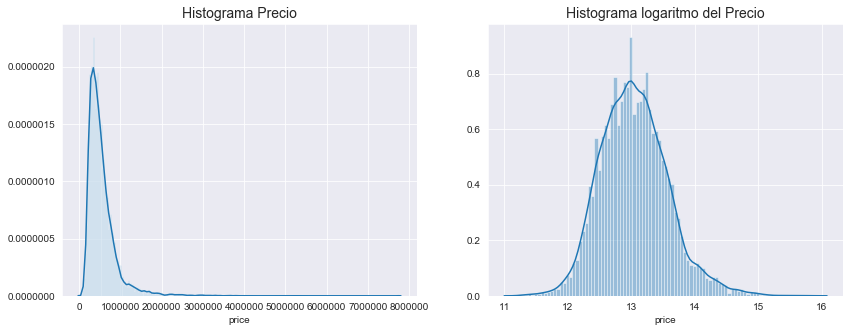

In [5]:
from sklearn.preprocessing import StandardScaler

# Normalizamos la variable precio
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled['price'] = np.log(df['price'])

fig , ax = plt.subplots(1,2,figsize = (14,5))
sn.distplot(df['price'], bins='fd',ax = ax[0])
ax[0].set_title('Histograma Precio', size = 14)
sn.distplot(df_scaled['price'], bins = 'fd', ax = ax[1])
ax[1].set_title('Histograma logaritmo del Precio', size = 14);

### Normalización de datos

Escalar una variable permite ajustar su rango de valores a un rango acotado predefinido, este tipo de preprocesamiento se utiliza cuando el modelo que se tiene es sensible a magnitudes, en nuestro caso, la variable objetivo para la regresión es *price*, la cual presenta rangos de valores en magnitudes demasiado distintas en comparación a los atributos con los que alimentaremos el modelo, como el número de baños (rango 0-8), el número de habitaciones (rango 0-33), etc. Si no se escala la variable, se generará un modelo en el cual, al aumentar en un pequeño diferencial el atributo (*feature*), la variable objetivo de la predicción experimentará un aumento considerable.

Es interesante notar que algunos algoritmos pueden mejorar considerablemente su rapidez de convergencia con datos normalizados (máquinas de soporte vectorial, por ejemplo). En nuestro caso, puesto que se realizará una regresión lineal de mínimos cuadrados, la normalización no tiene este tipo de efecto pues no varía la correlación de los coeficientes al ser términos lineales. Podemos ver como la dispersión de los valores de la variable se reduce notablemente.

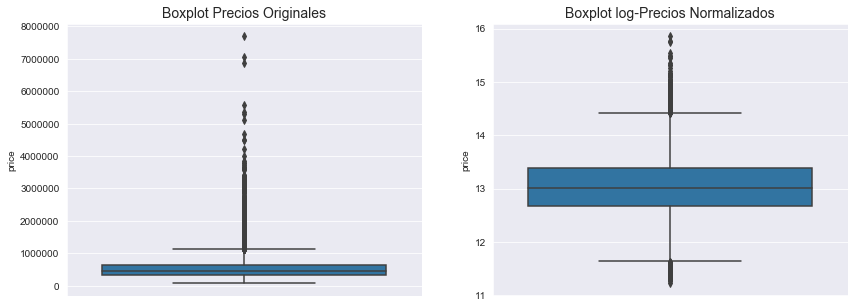

In [6]:
fig, ax = plt.subplots(1,2, figsize = (14,5))

sn.boxplot(df['price'], orient='v', ax = ax[0])
ax[0].set_title('Boxplot Precios Originales', size = 14);

# Graficamos 
sn.boxplot(df_scaled['price'], orient = 'v', ax = ax[1])
ax[1].set_title('Boxplot log-Precios Normalizados', size = 14);

La normalización de variables en un dataset se utiliza, por lo general, cuando necesitamos aplicar un proceso que asume normalidad en la variable, o un escalamiento para acotar los valores de ciertas variables a un cierto rango tratable y comparable con los de otras variables, en nuestro caso, el modelo asume que el error al de cada estimador de los coeficientes con respecto a su valor paramétrico es normal. Podemos observar los histogramas de la variable precio antes y despues de normalizarla:

Antes de entrenar cualquier modelo, necesitamos dividir el dataset en al menos dos conjuntos: **Entrenamiento** y **Validación**, esto lo podemos realizar fácilmente con la función `train_test_split()` de la librería `sklearn`, utilizaremos un `test-size` de 30% de la data, el resto será dedicada a entrenamiento:

In [7]:
from sklearn.model_selection import train_test_split

# X será nuestro conjunto de atributos. y será nuestra variable objetivo
X = df_scaled.iloc[:, 1:] # Tomamos todas las columnas menos la primera (price)
N = X.shape[0] # guardamos el número de filas (datos de entrenamiento)
X.insert(X.shape[1], 'intercept', np.ones(N)) #Se crea una columna nueva dentro de las variables predictoras llamada 'intecept'
y = df_scaled['price'] # asignamos como target la variable 'price'
#Separamos los subsets de test y train
X_train, X_test, y_train, y_test,  = train_test_split(X, y, test_size = 0.3, random_state = 63)

## Búsqueda de hiperparámetros y early stopping
Como mencionamos, la elección de $\lambda$ es '*a la carte*', más formalmente, este tipo de valores los cuales nosotros debemos escoger se llaman **Hiperparámetros**. Cada modelo/agenda de entrenamiento tiene sus propios hiperparámetros los cuales deberémos saber interpretar si queremos sacar el mayor provecho a nuestro modelo.

Si bien no existe una regla clara para escoger hiperparámetros (es un problema complejo por lo mismo), una técnica usual para explorar este tipo de problemas consiste en detener el entrenamiento/búsqueda de hiperparámetros óptimos cuando veamos algún tipo de convergencia o mínimo local. A esta idea de *detener el entrenamiento antes de tiempo*, se le conoce más formalmente como *Early Stopping*.

Puesto que entrenar un modelo de regresión lineal con una matriz de datos como la que tenemos es *barato* computacionalmente, nos daremos el lujo de evaluar varios valores para $\lambda$ y eligiremos el que entrega menor error de validación, exploraremos el rango de valores de $\lambda \in [10^7, 10^3]$.

Para implementar un modelo con regularización Ridge, importamos las clases `Ridge` y `RidgeCV` dentro de `sklearn.linear_model`. Un punto de confusión que surge en la implementación de los métodos de regularización en `sklearn` es que el parámetro de penalización $\lambda$ está implementado con el nombre de `alpha`.

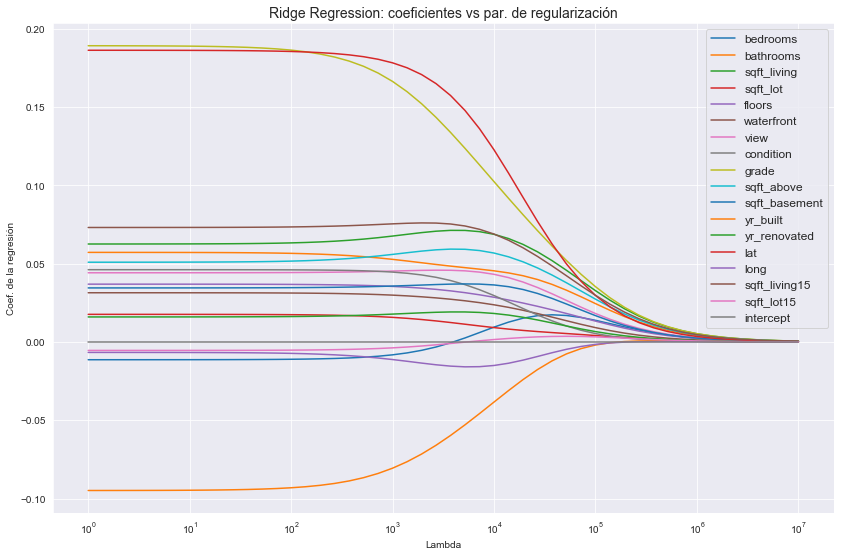

In [8]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import r2_score

names_regressors = X_train.columns # guardamos los nombres de los atributos
alphas = np.logspace(0, 7, base = 10) # generamos un vector con los valores de la norma
coefs_ridge = [] #lista para guardar parámetros
cv_err_ridge = [] #lista para guardar parámetros
model_ridge = Ridge(fit_intercept = True) # instanciamos el modelo
tol = 0.1 # determinamos el umbral de tolerancia

# para cada valor en el vector
for a in alphas:
    # estimamos el modelo con éste
    model_ridge.set_params(alpha = a)
    model_ridge.fit(X_train, y_train)
    # guardamos el coeficiente estimado
    coefs_ridge.append(model_ridge.coef_)
    # generamos su estimado de validación cruzada
    dummy,cv_err_estimates = cv_error(X_train, y_train, k = 10, method = 'ridge', alpha = a)
    cv_err_ridge.append(np.mean(cv_err_estimates)) # OJO: estamos guardando la media del error de cv para cada alpha


plt.figure(figsize = (14,9))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs_ridge).T, names_regressors):
    plt.plot(alphas, y_arr, label = label)

plt.legend()
ax.set_xscale("log")
plt.title("Ridge Regression: coeficientes vs par. de regularización", size = 14)
plt.xlabel('Lambda')
plt.ylabel('Coef. de la regresión')
plt.axis("tight")
plt.legend(loc = 1, fontsize = 12);


A partir de este gráfico podemos ver algunas cosas interesantes:
* Tener un parámetro de regularización de $10^0$ produce el mismo resultado en los coeficientes que un parámetro de $10^1$, el último es muy débil y es casi inofensivo. 
* En efecto, al tener un parámetro de regularización lo suficientemente grande, los coeficientes de algunos atributos se hacen cada vez más pequeños (cada vez se les penaliza más) hasta hacerse casi iguales a $0$.
* Para un parámetro de regularización lo suficientemente grande, todos los coeficientes se hacen casi iguales a $0$, por lo que no podemos excedernos mucho con el valor del mismo.
* Ridge se dice que es un **método de contracción (shrinkage method)** porque "*contrae*" los valores de los coeficientes de la regresión.

Veamos como se comporta el error de validación para cada $\lambda$:


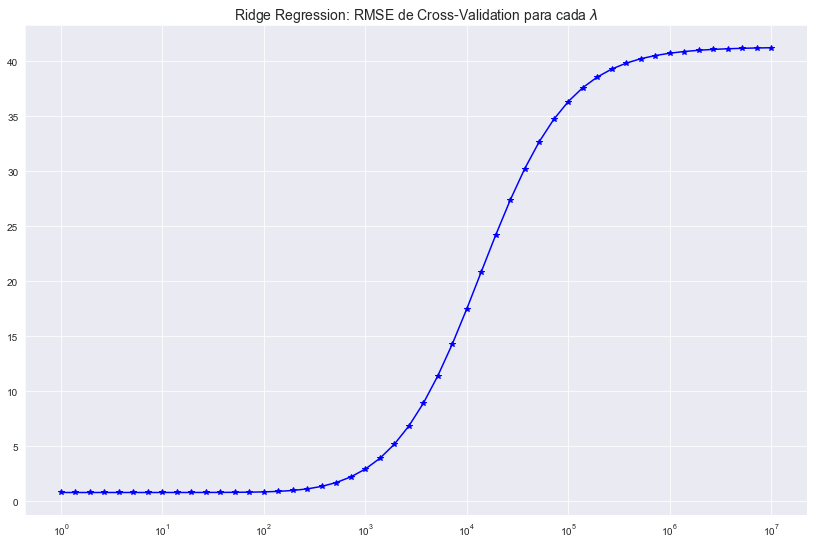

In [9]:
plt.figure(figsize = (14,9))
ax = plt.gca()
plt.plot(alphas, np.sqrt(cv_err_ridge),"b*-")
ax.set_xscale("log")
plt.title("Ridge Regression: RMSE de Cross-Validation para cada $\lambda$", fontsize = 14);


Como mencionamos anteriormente, nuestro objetivo es encontrar el valor de $\lambda$ mínimo, sin embargo, parecen haber varios valores que se ajustan a nuestro criterio. Aprovecharemos de introducir una función conveniente que implementa la librería `sklearn` llamada `RidgeCV`:

In [10]:
alphas_ = np.logspace(0, 7, base = 10)
ridge_cv = RidgeCV(cv = 10,)
model_ridge = ridge_cv.fit(X_train, y_train)

El modelo elige automáticamente el valor de $\lambda$ que minimiza el error de validación:

In [11]:
print('Valor del parámetro de regularización: {0}'.format(model_ridge.alpha_))
print('Coeficientes finales: \n{0}'.format(model_ridge.coef_))
print('R-squared: {0}'.format(r2_score(model_ridge.predict(X_test), y_test)))

Valor del parámetro de regularización: 10.0
Coeficientes finales: 
[-0.01130049  0.05717332  0.06264874  0.01764058  0.03692392  0.03143451
  0.04422176  0.04616988  0.18895082  0.05101663  0.03455404 -0.09467497
  0.01602423  0.18624593 -0.0067097   0.07316506 -0.00536286  0.        ]
R-squared: 0.6973292118563914


Para finalizar nuestra aventura por Ridge, se debe mencionar que __Ridge no puede ocuparse como un método de *selección de atributos*__, es decir, la cantidad de atributos de una regresión lineal ordinaria es la misma que la cantidad de atributos que tenemos al hacer una regresión vía Ridge.

----

## Lasso: norma-$\mathscr{l}_{1}$

Otro método de contracción para la regresión lineal que estudiaremos es el llamado *Lasso* (acrónimo de _Least Absolute Shrinkage and Selection Operator_), este método opera de una forma muy similar a Ridge. Sin embargo, si permite hacer selección de atributos (descartar atributos poco relevantes para el modelo) a diferencia de Ridge, que simplemente los encogía cada vez más. Lasso opera penalizando la función objetivo de la siguiente forma:

$$
\beta_{\textsf{Lasso}} = \underset{\beta}{\textsf{argmin}} \sum_{i}^{n} (y_i-\hat{y_i})^2 + \lambda \sum_{j=1}^{p}|\beta_j|
$$

A diferencia de Ridg, Lasso penaliza por la norma $\mathscr{l}_{1} = \vert \beta \vert$. Esto se traduce en que finalmente el modelo será capaz de eliminar ciertos atributos de la regresión, los cuales considerará que no son suficientemente relevantes.

Veamos como caen los pesos de los coeficientes al aplicar Lasso a los mismos datos anteriores:

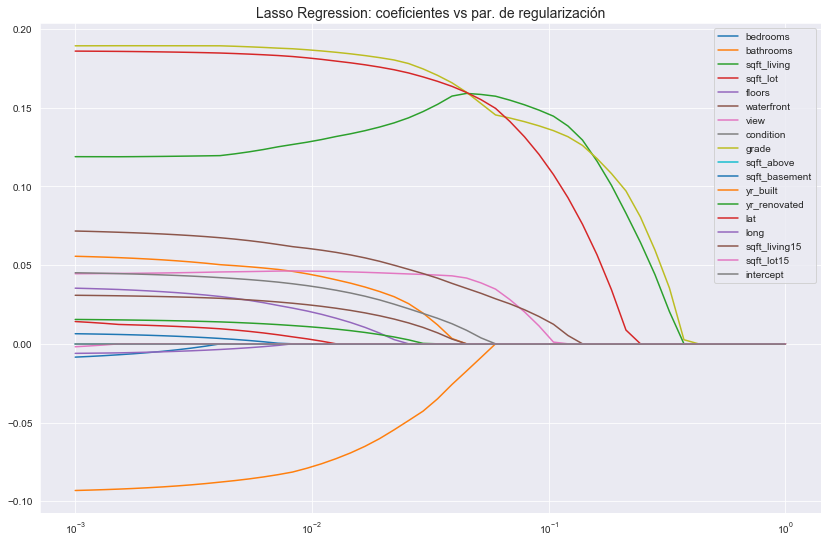

In [12]:
from sklearn.linear_model import Lasso, LassoCV

names_regressors = X.columns
alphas_ = np.logspace(0, -3, base = 10)
coefs_lasso = []
cv_err_lasso = []
model_lasso = Lasso(fit_intercept = True)

for a in alphas_:
    model_lasso.set_params(alpha = a)
    model_lasso.fit(X_train, y_train)
    coefs_lasso.append(model_lasso.coef_)
    dummy,cv_err_estimates = cv_error(X_train,y_train,k = 10, method = 'lasso', alpha = a)
    cv_err_lasso.append(np.mean(cv_err_estimates))

plt.figure(figsize = (14,9))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs_lasso).T, names_regressors):
    plt.plot(alphas_, y_arr, label = label)

plt.legend()
ax.set_xscale("log")

plt.title("Lasso Regression: coeficientes vs par. de regularización", fontsize = 14)
plt.axis("tight")
plt.legend(loc = 1)
plt.show()

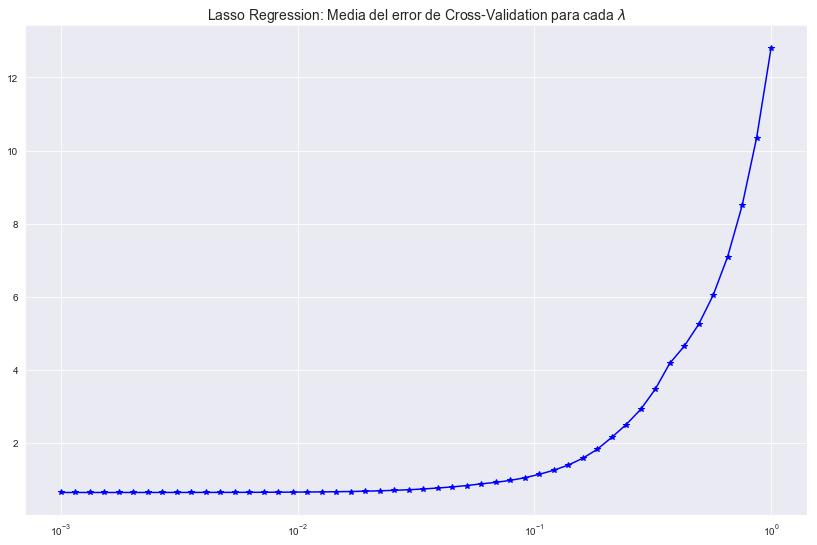

In [13]:
plt.figure(figsize = (14,9))
ax = plt.gca()
plt.plot(alphas_, cv_err_lasso,"b*-")
ax.set_xscale("log")
plt.title("Lasso Regression: Media del error de Cross-Validation para cada $\lambda$", fontsize = 14)
plt.show()

* Los pesos caen de forma mucho mas abrupta que en Ridge, producto de la naturaleza de Lasso.
* Ciertos atributos son restados del modelo de forma mucho más temprana que otros, reduciendo rápidamente el número de atributos del modelo, o dicho de otra forma, seleccionando atributos más relevantes para explicar los datos.

Nuevamente veremos el error de validación cruzada para Lasso, nuestro objetivo será encontrar ya sea un punto en el que observemos convergencia, o uno en el que el error sea un mínimo local:


In [14]:
alphas_ = np.logspace(0, -3, base = 10)
lasso_cv = LassoCV()
model_lasso = lasso_cv.fit(X_train, y_train)

print('Valor del parámetro de regularización: {0}'.format(model_lasso.alpha_))
print('Coeficientes finales: \n{0}'.format(model_lasso.coef_))
print('R-squared: {0}'.format(r2_score(model_lasso.predict(X_test), y_test)))

Valor del parámetro de regularización: 0.0003753797351375849
Coeficientes finales: 
[-0.01024032  0.05663014  0.11897972  0.01634357  0.03634553  0.03122292
  0.04432799  0.04579056  0.18927954  0.          0.00698097 -0.09423091
  0.01580353  0.18619272 -0.00642786  0.07259197 -0.0040628   0.        ]
R-squared: 0.6965396239093491


Ahora que ya hemos visto el efecto que produce Lasso sobre los coeficientes, al igual que en Ridge, nos interesa buscar el valor de $\alpha$ relativamente previo al valor en el que se dispara el error de validación:

El problema de Ridge es que no es capaz de hacer una selección de atributos afectiva debido a que nunca hace exactamente $0$ los coeficientes, el problema de Lasso es que muchas veces es muy agresivo en la reducción de atributos, el modelo que veremos a continuación es una mezcla de ambos y trata de quedarse con lo mejor de ambos modelos de regularización.

------

## Elastic Net

Elastic Net es el último modelo de regularización que veremos, este modelo combina ambas penalizaciones vistas, Lasso y Ridge bajo el argumento de fomar una regularización que sea capaz de penalizar efectivamente los coeficientes de los atributos, como lo hace Ridge, y además sea capaz de realizar selección de atributos como lo hace Lasso. La función objetivo de Elastic Net se conforma de la siguiente manera:

$$
\beta_{\textsf{ElasticNet}} = \underset{\beta}{\textsf{argmin}} \sum_{i}^{n} (y_i-\hat{y_i})^2 + \lambda_1 \sum_{j=1}^{p}|\beta_j| + \lambda_2 \sum_{j=1}^{p}\beta_{j}^2
$$

Algo importante que debe tenerse en cuenta sobre este modelo es que, a diferencia de Lasso y Ridge, ahora tenemos que encontrar los valores para dos parámetros de regularización en lugar de uno.

Veamos Elastic Net en la práctica, el objeto `ElasticNet` de `sklearn` define el juego entre los parámetros de ambas penalizaciones de forma no tan intuitiva, por lo que trabajaremos con los valores predefinidos de penalización para cada modelo que define el objeto por defecto. Si se quiere modificar estos valores se puede consultar la documentación de `ElasticNet`:

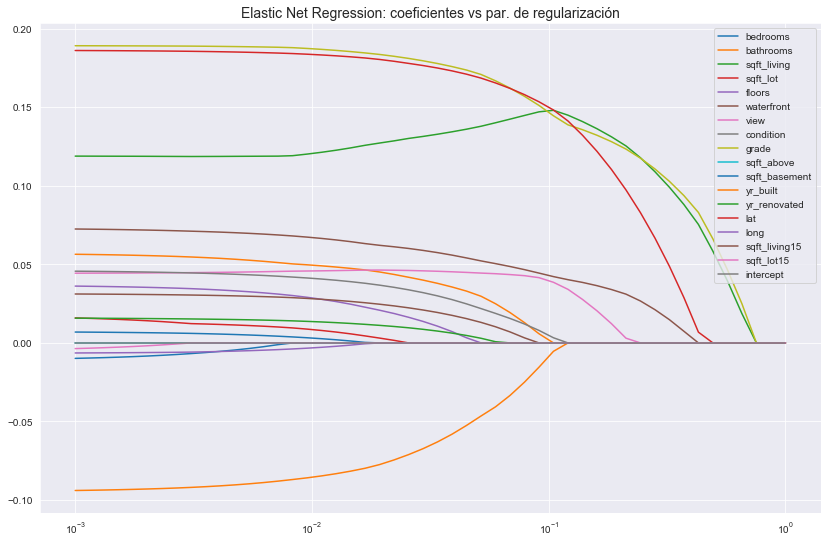

In [15]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

names_regressors = X.columns
alphas_ = np.logspace(0, -3, base = 10)
coefs_elastic_net = []
cv_err_elastic_net = []
model_elastic_net = ElasticNet(fit_intercept = True)


for a in alphas_:
    model_elastic_net.set_params(alpha = a)
    model_elastic_net.fit(X_train, y_train)
    coefs_elastic_net.append(model_elastic_net.coef_)
    dummy,cv_err_estimates = cv_error(X_train,y_train,k = 10, method = 'elastic net', alpha = a)
    cv_err_elastic_net.append(np.mean(cv_err_estimates))

plt.figure(figsize = (14,9))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs_elastic_net).T, names_regressors):
    plt.plot(alphas_, y_arr, label = label)

plt.legend()
ax.set_xscale("log")

plt.title("Elastic Net Regression: coeficientes vs par. de regularización", fontsize = 14)
plt.axis("tight")
plt.legend(loc = 1);

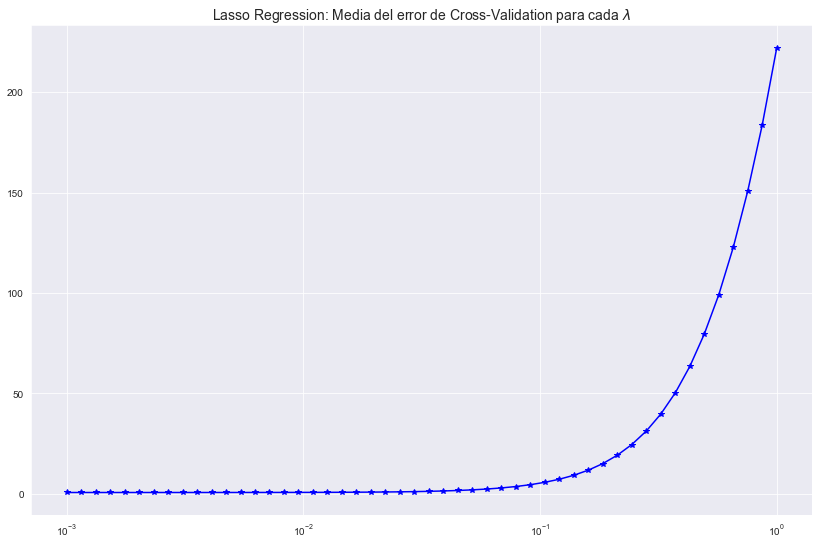

In [16]:
plt.figure(figsize = (14,9))
ax = plt.gca()
plt.plot(alphas_, cv_err_elastic_net,"b*-")
ax.set_xscale("log")
plt.title("Lasso Regression: Media del error de Cross-Validation para cada $\lambda$", fontsize = 14)
plt.show()


Podemos ver como Elastic Net hace en efecto decaer los pesos de los coeficientes de la misma forma en que lo hace Ridge, también podemos observar como ciertos atributos son restados del modelo al hacer sus coeficientes igual a cero.

Como mencionamos anteriormente la forma en la que la librería `sklearn` implementa el regularizador de ElasticNet es un poco más complicada de lo que desearíamos, de alguna forma trata de simplificar el uso del método, para configurar los parámetros de regularización por separado hay que modificar los parámetros `l1_ratio` y `alpha`, sin embargo, nosotros experimentaremos solo con `alpha` y buscaremos el valor que nos sea conveniente:

In [17]:
alphas_ = np.logspace(0, -3, base = 10)
elastic_cv = ElasticNetCV(cv = 10)
model_elastic = elastic_cv.fit(X_train, y_train)

print('Valor del parámetro de regularización: {0}'.format(model_elastic.alpha_))
print('Coeficientes finales: \n{0}'.format(model_elastic.coef_))
print('R-squared: {0}'.format(r2_score(model_elastic.predict(X_test), y_test)))

Valor del parámetro de regularización: 0.0007507594702751691
Coeficientes finales: 
[-0.01020259  0.05662165  0.11892443  0.01633775  0.03635761  0.03121637
  0.04433303  0.04578218  0.18915541  0.          0.0070188  -0.09414242
  0.01581814  0.18614231 -0.00645338  0.07265358 -0.00404842  0.        ]
R-squared: 0.6964169816404744


# Referencias

* Los ejemplos de la lectura se basan en James, G; Witten, D; Hastie, T; Tibshirani, R. 2013. An Introduction to Statistica Learning. Ch6: Linear Model Selection and Regularization.
* Aquellos que deseen profundizar en los aspectos teóricos de los métodos de regularización pueden consultar Efron, B; Hastie, T. 2016. Computer Age Statistical Inference. Algorithms, Evidence and Data Science. Ch 7. James-Stein Estimation and Ridge Regression. Ch 16. Sparse Modeling and the Lasso.

-------
